In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Prepare the Data
whdf1 = pd.read_csv("whale_returns.csv", index_col='Date',parse_dates=True, infer_datetime_format=True)
ardf1 = pd.read_csv("algo_returns.csv", index_col='Date',parse_dates=True, infer_datetime_format=True)
spdf1 = pd.read_csv("sp_tsx_history.csv", index_col='Date',parse_dates=True, infer_datetime_format=True)
cust_df = pd.read_csv("greg_Stocks01.csv", index_col='Date',parse_dates=True, infer_datetime_format=True)

In [3]:
# removing NA's
whdf = whdf1.dropna()
ardf = ardf1.dropna()
spdf = spdf1.dropna()

In [4]:
#removing dollar sign ------------- could not convert to num becaouse of , so I removed them too
spdf['Close'] = spdf['Close'].replace({'\$':''}, regex = True)
spdf['Close'] = spdf['Close'].replace({'\,':''}, regex = True)

In [5]:
#casting Close column to numeric
spdf['Close'] = pd.to_numeric(spdf['Close'])

In [6]:
#converting Close to daily return
spdr = spdf.pct_change(1)

In [7]:
#droping first row which is NaN
spdr.dropna(inplace=True)

In [8]:
alldf = pd.concat([whdf, ardf, spdr], axis = "columns", join = "inner")
alldf = alldf.sort_index()
alldf.columns = ["SFM", "P&C", "TGM", "BHI", "ALGO1", "ALGO2", "SP"]

In [9]:
alldf

,SFM,P&C,TGM,BHI,ALGO1,ALGO2,SP
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [10]:
#Conduct Quantitative Analysis

<AxesSubplot:xlabel='Date'>

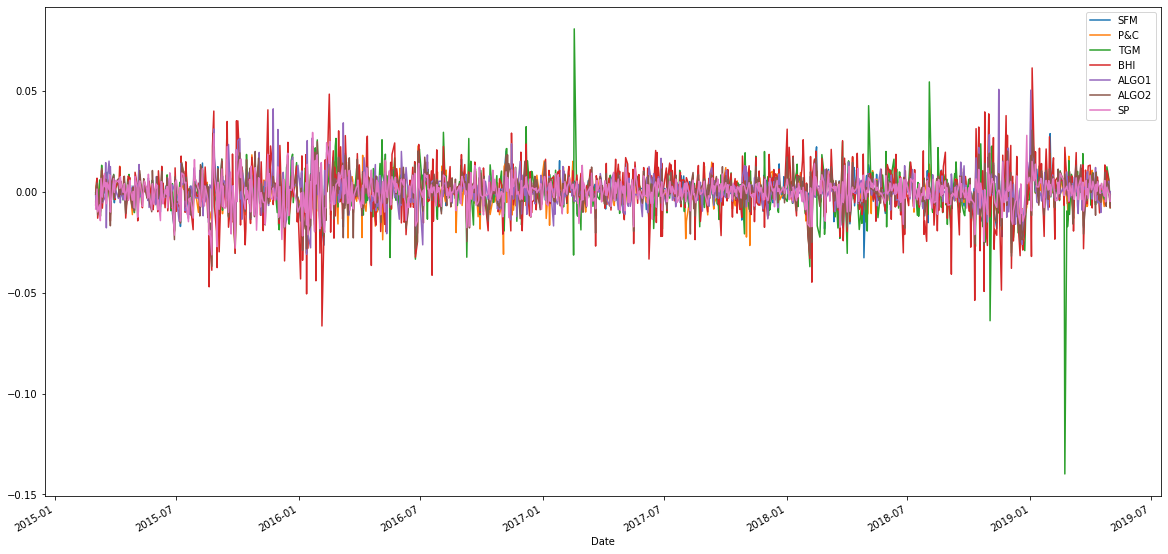

In [11]:
#daily returns
#df already has daily return, just converted SP because was the only one with closing price
alldf.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Cumulative Returns all portfolios'}, xlabel='Date'>

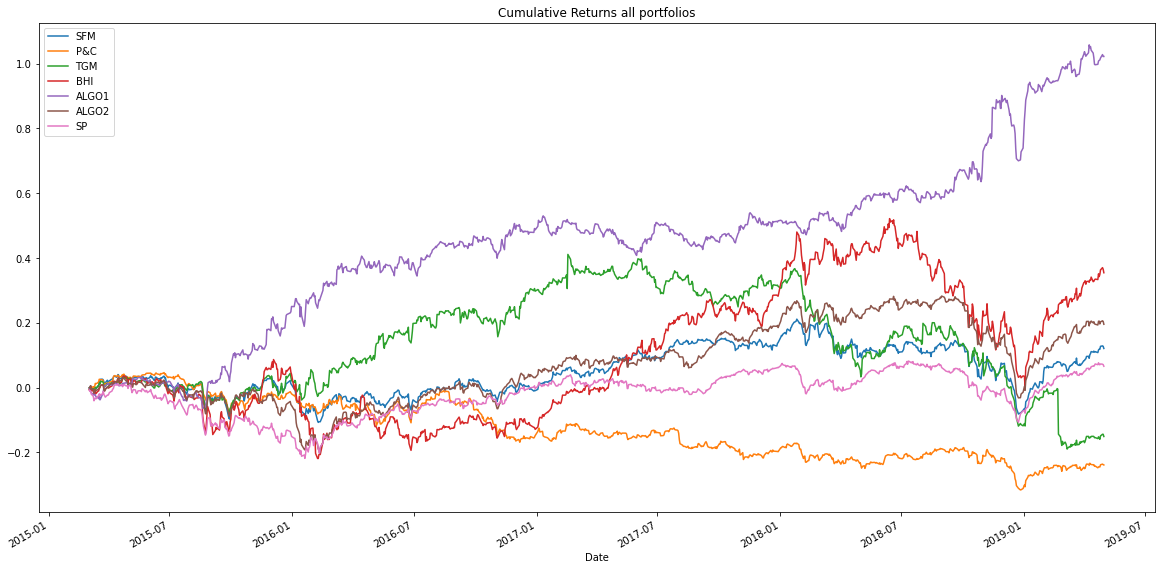

In [12]:
cumulative_returns = (1 + alldf).cumprod() - 1
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns all portfolios")

In [13]:
#risk analysis
#creating std deviation for all portfolios in one df
allstd = alldf.std()

In [14]:
allstd

SFM      0.007828
P&C      0.006982
TGM      0.010883
BHI      0.012826
ALGO1    0.007589
ALGO2    0.008326
SP       0.007034
dtype: float64

<AxesSubplot:>

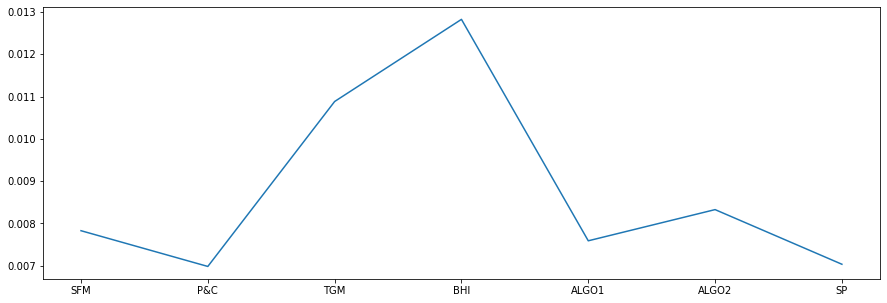

In [15]:
#ploting std deviation for eah portfolio
allstd.plot(figsize=(15,5))

In [16]:
#annualized dev
allstd_a = allstd * np.sqrt(252)

In [17]:
print([allstd_a])

[SFM      0.124259
P&C      0.110841
TGM      0.172759
BHI      0.203599
ALGO1    0.120470
ALGO2    0.132177
SP       0.111664
dtype: float64]


<AxesSubplot:title={'center':'SFM'}, xlabel='Date'>

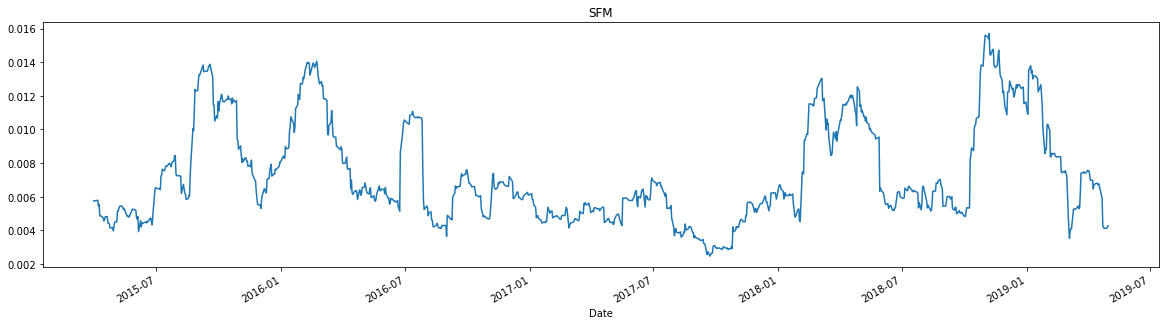

In [18]:
#Rolling Statistics - Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
alldf['SFM'].rolling(window=21).std().plot(figsize=(20,5), title="SFM")

<AxesSubplot:title={'center':'P&C'}, xlabel='Date'>

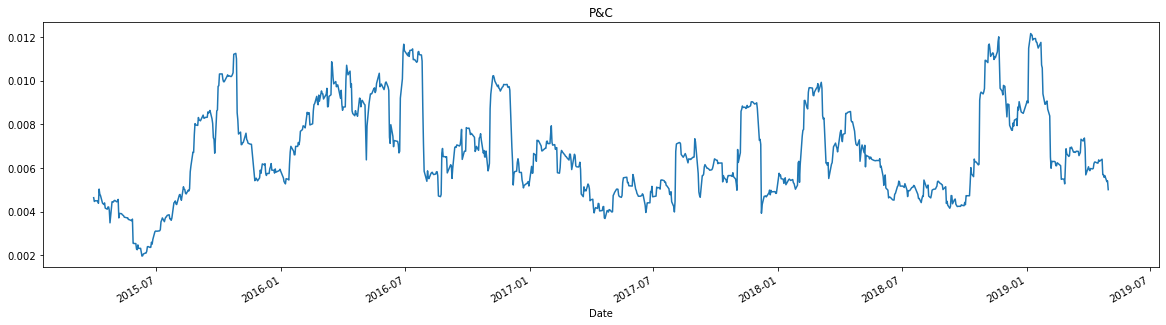

In [19]:
alldf['P&C'].rolling(window=21).std().plot(figsize=(20,5), title="P&C")

<AxesSubplot:title={'center':'TGM'}, xlabel='Date'>

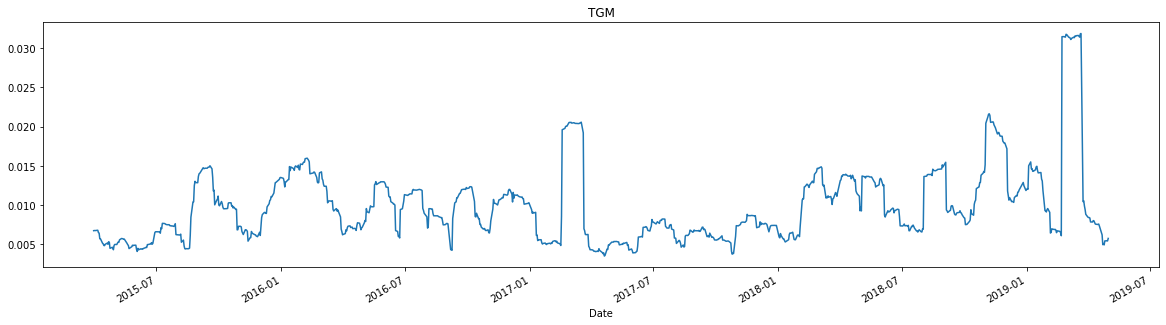

In [20]:
alldf['TGM'].rolling(window=21).std().plot(figsize=(20,5), title="TGM")

<AxesSubplot:title={'center':'BHI'}, xlabel='Date'>

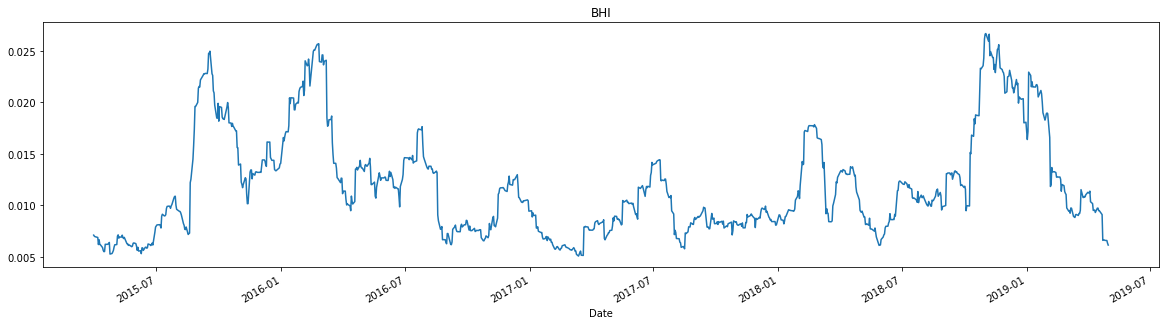

In [21]:
alldf['BHI'].rolling(window=21).std().plot(figsize=(20,5), title="BHI")

<AxesSubplot:title={'center':'ALGO 1'}, xlabel='Date'>

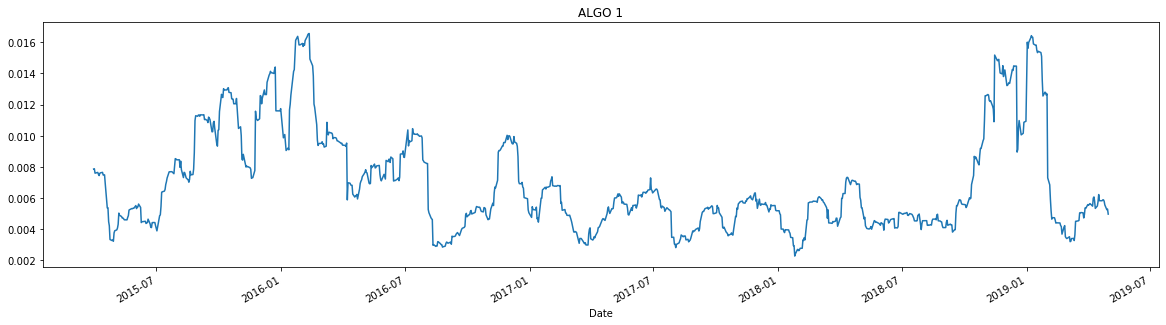

In [22]:
alldf['ALGO1'].rolling(window=21).std().plot(figsize=(20,5), title="ALGO 1")

<AxesSubplot:title={'center':'ALGO 2'}, xlabel='Date'>

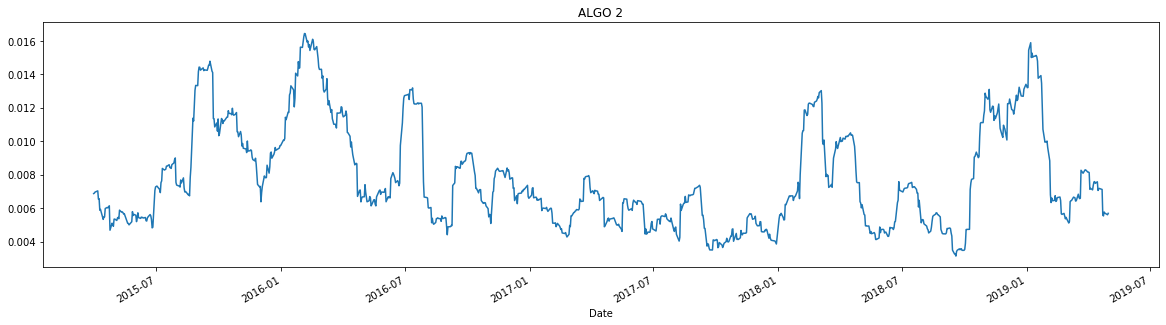

In [23]:
alldf['ALGO2'].rolling(window=21).std().plot(figsize=(20,5), title="ALGO 2")

<AxesSubplot:title={'center':'SP'}, xlabel='Date'>

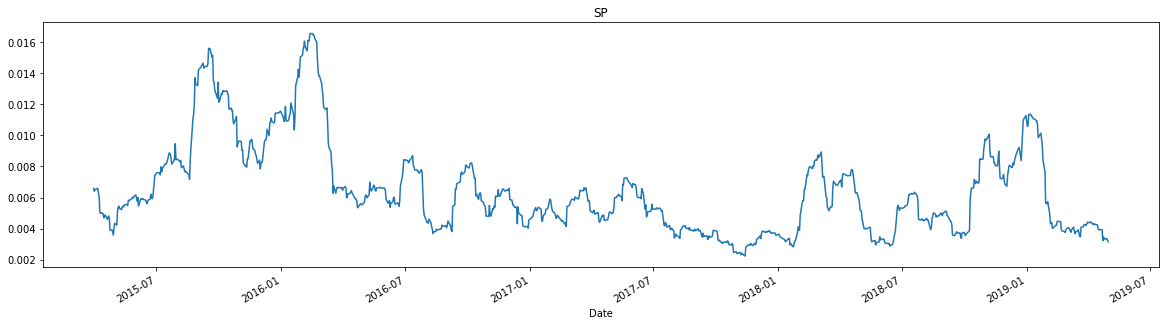

In [24]:
alldf['SP'].rolling(window=21).std().plot(figsize=(20,5), title="SP")

<AxesSubplot:title={'center':'ALL PORTFOLIOS'}, xlabel='Date'>

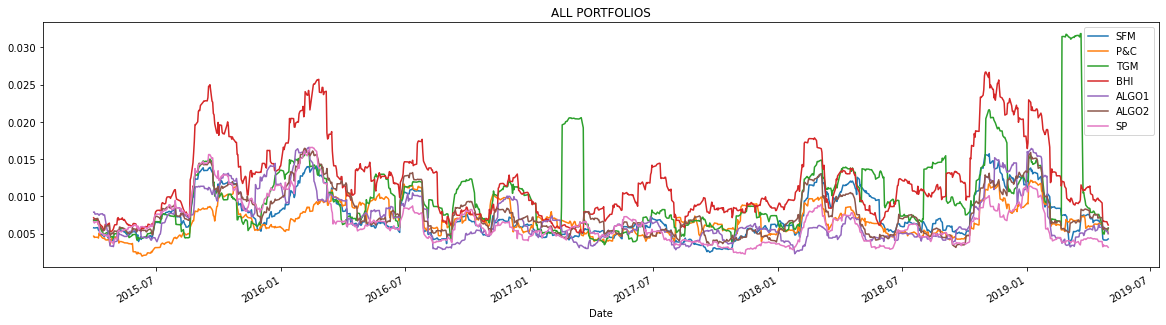

In [25]:
#all portfolios in one plot
alldf.rolling(window=21).std().plot(figsize=(20,5), title="ALL PORTFOLIOS")

In [26]:
#Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
corr_alldf = alldf.corr(method='pearson')
corr_alldf.head().reset_index()
corr_alldf.head(10)

,SFM,P&C,TGM,BHI,ALGO1,ALGO2,SP
SFM,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
P&C,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TGM,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BHI,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
ALGO1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
ALGO2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

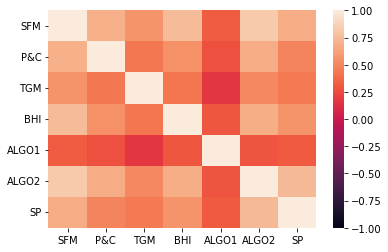

In [27]:
sns.heatmap(corr_alldf, vmin=-1, vmax=1)

In [28]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.
#copying alldf to compdf
compdf = alldf
compdf

,SFM,P&C,TGM,BHI,ALGO1,ALGO2,SP
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [29]:
#deleting columns by column numnber
compdf = compdf.drop(compdf.columns[[0,2,3,4,5]],axis=1)
compdf

,P&C,SP
Date,,
2015-03-03,-0.004981,-0.008530
2015-03-04,0.003241,-0.003371
2015-03-05,0.004076,0.001344
2015-03-06,-0.003574,-0.009972
2015-03-09,0.004225,-0.006555
...,...,...
2019-04-25,-0.001291,-0.000628
2019-04-26,0.009162,0.002254
2019-04-29,0.002719,-0.000788


In [30]:
#Beta Values
r_cov = compdf['P&C'].rolling(window=60).cov(compdf['SP'])
r_var = compdf['SP'].rolling(window=30).var()

<AxesSubplot:title={'center':'60-Day Rolling Covariance of P&C Returns vs. S&P Returns'}, xlabel='Date'>

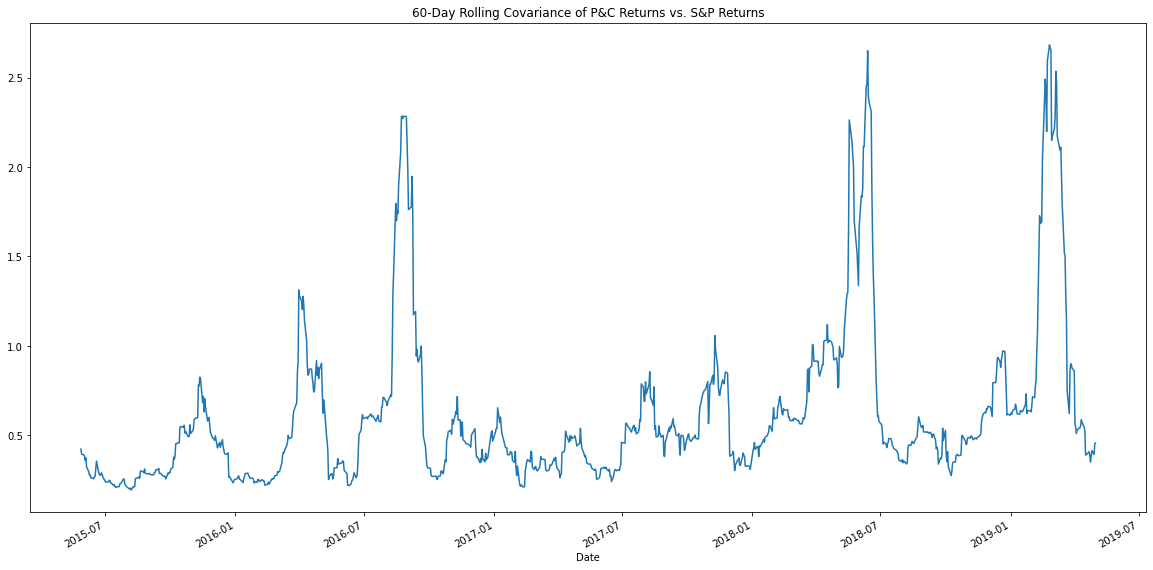

In [31]:
rolling_covariance = r_cov / r_var
rolling_covariance.plot(figsize=(20, 10), title='60-Day Rolling Covariance of P&C Returns vs. S&P Returns')

In [32]:
#Rolling Statistics Challenge: Exponentially Weighted Average


In [33]:
#Custom Portfolio

cust_df.head()

,DJI,NIFTY,UKX
Date,,,
2015-03-03,18203.37,8342.15,6949.63
2015-03-04,18096.90,8341.40,6935.38
2015-03-05,18135.72,8492.30,6949.73
2015-03-06,17856.78,8491.00,6946.66
2015-03-09,17995.72,8586.25,6940.64


In [34]:
w = [2.0,2.0,2.0]

In [35]:
print(sum(w))

6.0


In [36]:
d_ret =  cust_df.pct_change()[1:]

In [37]:
print(d_ret.head())

                 DJI     NIFTY       UKX
Date                                    
2015-03-04 -0.005849 -0.000090 -0.002050
2015-03-05  0.002145  0.018090  0.002069
2015-03-06 -0.015381 -0.000153 -0.000442
2015-03-09  0.007781  0.011218 -0.000867
2015-03-10 -0.018492  0.008578 -0.007422


In [38]:
weighted_returns = ( w * d_ret)
print(weighted_returns.head())

                 DJI     NIFTY       UKX
Date                                    
2015-03-04 -0.011698 -0.000180 -0.004101
2015-03-05  0.004290  0.036181  0.004138
2015-03-06 -0.030761 -0.000306 -0.000883
2015-03-09  0.015562  0.022436 -0.001733
2015-03-10 -0.036984  0.017155 -0.014843


In [39]:
alldf1 = pd.concat([weighted_returns, alldf], axis = "columns", join = "inner")
alldf1 = alldf1.sort_index()

In [40]:
len(alldf1)

1026

In [41]:
#alldf1['NIFTY'].dropna(inplace = True)

In [42]:
alldf1

,DJI,NIFTY,UKX,SFM,P&C,TGM,BHI,ALGO1,ALGO2,SP
Date,,,,,,,,,,
2015-03-04,-0.011698,-0.000180,-0.004101,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004290,0.036181,0.004138,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.030761,-0.000306,-0.000883,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.015562,0.022436,-0.001733,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.036984,0.017155,-0.014843,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.010149,-0.000009,0.001348,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.006141,0.024000,-0.007064,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.000833,-0.018197,-0.000986,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [48]:
#Calculate the Annualized Standard Deviation.
asd = alldf1 * np.sqrt(252)

<AxesSubplot:title={'center':'Annualized Standard Dev Custom Portfolio'}, xlabel='Date'>

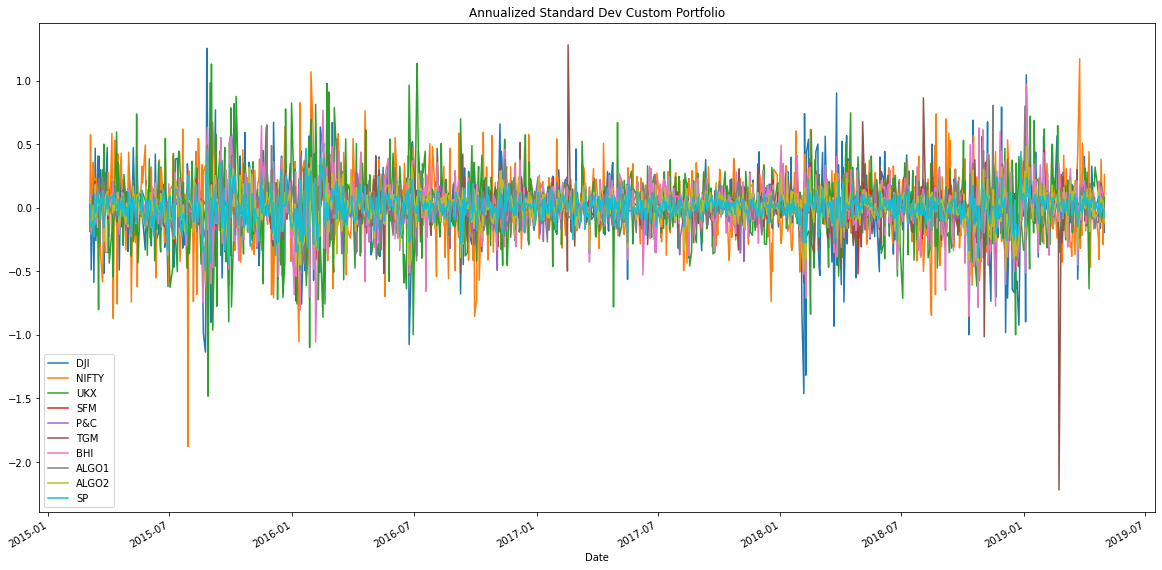

In [49]:
asd.plot(figsize=(20,10), title='Annualized Standard Dev Custom Portfolio')

<AxesSubplot:xlabel='Date'>

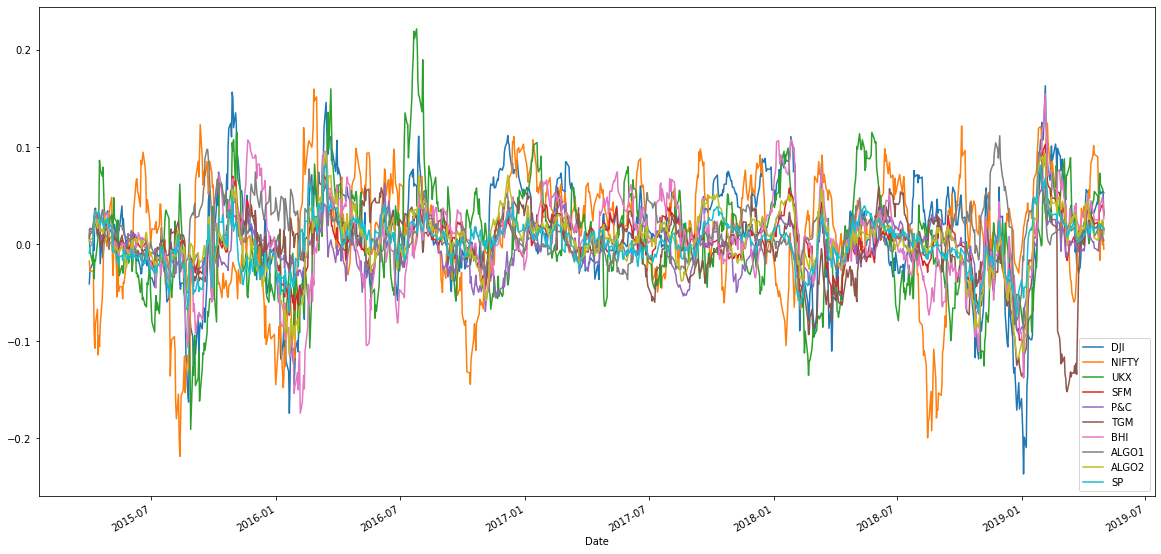

In [50]:
##Calculate and plot rolling std with a 21-day window
asd.rolling(window=21).mean().plot(figsize=(20,10))

In [51]:
#Calculate and plot the correlation.
asd = asd.corr(method='pearson')
asd.head().reset_index()
asd.head(10)


,DJI,NIFTY,UKX,SFM,P&C,TGM,BHI,ALGO1,ALGO2,SP
DJI,1.000000,-0.034393,0.016532,0.768432,0.601202,0.596915,0.682635,0.244499,0.803066,0.701479
NIFTY,-0.034393,1.000000,-0.003770,-0.006761,-0.002068,-0.013857,-0.042696,-0.014356,-0.022871,-0.024081
UKX,0.016532,-0.003770,1.000000,-0.023973,0.001805,0.014373,-0.053070,-0.080804,-0.021259,-0.011507
SFM,0.768432,-0.006761,-0.023973,1.000000,0.696884,0.560642,0.750165,0.314112,0.826611,0.673993
P&C,0.601202,-0.002068,0.001805,0.696884,1.000000,0.432507,0.539772,0.266724,0.673719,0.485416
TGM,0.596915,-0.013857,0.014373,0.560642,0.432507,1.000000,0.423384,0.161576,0.506176,0.440250
BHI,0.682635,-0.042696,-0.053070,0.750165,0.539772,0.423384,1.000000,0.289428,0.684698,0.557070
ALGO1,0.244499,-0.014356,-0.080804,0.314112,0.266724,0.161576,0.289428,1.000000,0.285911,0.310845
ALGO2,0.803066,-0.022871,-0.021259,0.826611,0.673719,0.506176,0.684698,0.285911,1.000000,0.737600
SP,0.701479,-0.024081,-0.011507,0.673993,0.485416,0.440250,0.557070,0.310845,0.737600,1.000000


<AxesSubplot:>

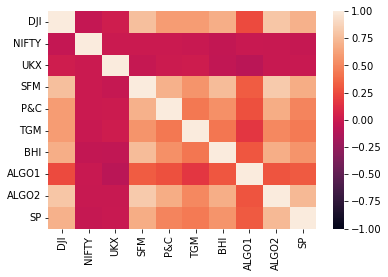

In [52]:
sns.heatmap(asd, vmin=-1, vmax=1)

In [56]:
#Calculate and plot the 60-day rolling beta for your portfolio compared to the S&P 60 TSX.
r_cov1 = asd.rolling(window=60).cov(asd['SP'])
r_var1 = asd['SP'].rolling(window=30).var()

<AxesSubplot:title={'center':'60-Day Rolling Covariance of P&C Returns vs. S&P Returns'}>

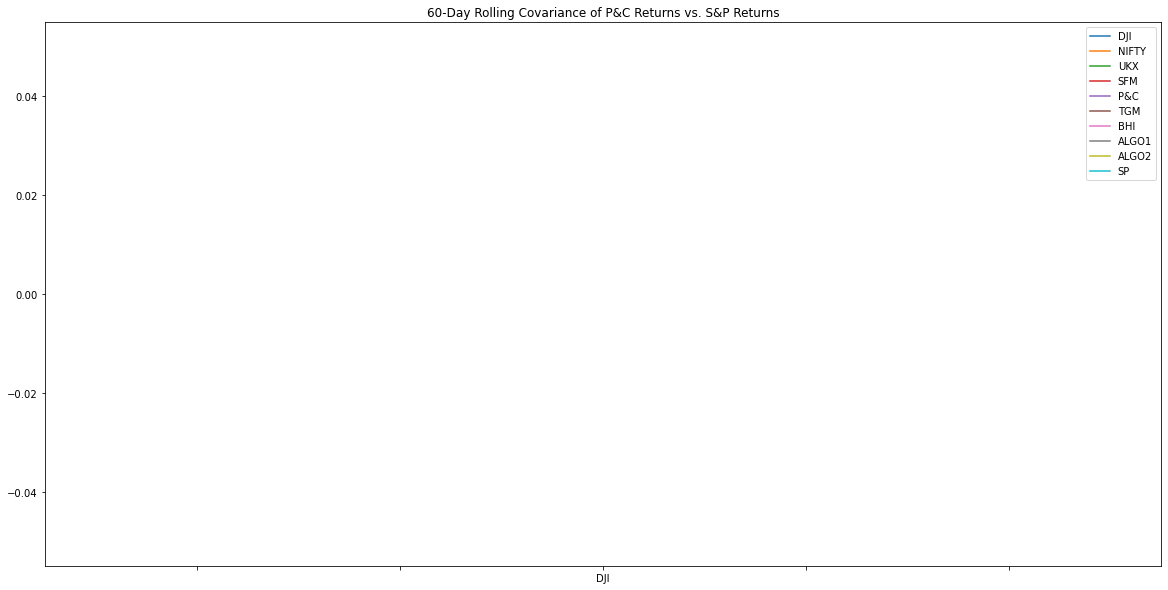

In [58]:
rolling_covariance1 = r_cov1 / r_var1
rolling_covariance1.plot(figsize=(20, 10), title='60-Day Rolling Covariance of P&C Returns vs. S&P Returns')
#rolling_covariance1